### 1
* $f(x) = ax^2 + bx + c$
 $$a \neq 0$$
$f'(x) = 2ax + b = 0; x^* = -\frac{b}{2a} $<br>$ f''(x) = 2a; a > 0 \rightarrow min $ at $ x^* = -\frac{b}{2a}, f(x^*) = -\frac{b^2}{4a} + c$
$$a = 0, b \neq 0$$
$f'(x) = b \rightarrow $ no minimum, if $a, b = 0, f(x) = c \rightarrow$ no minimum


### 2
$\nabla h(x) = A^T \nabla f(Ax)$ <br>
$\nabla f(Ax): (m,1), A^T: (k,m) \rightarrow \nabla h(x): (k, 1)$

### 3
* Strong convexity: $f(x) \geq f(x') + \nabla f(x')^T (x - x') + \frac{\mu}{2} ||x - x'||^2_2$
* In the minimum point $x^*$ the gradient is zero. Then: $ \frac{\mu}{2} ||x - x^*||^2_2 \leq f(x) - f(x^*)$

### 4
* Gradient: $\nabla f(x)_i = 2(c, x)c_i$
* Hessian: $H_{ij} =\frac {\partial \nabla f(x)_i}{\partial x_j}=  2 c_i c_j$

### 5
* Gradient: $\nabla f(x) = A^T \nabla g(Ax+b)$
* Hessian: $\nabla^2 f(x) = A^T \nabla^2 g(Ax + b) A$

### 6
* $f(\gamma) = (A(x + \gamma d), x + \gamma d) + (b, x + \gamma d)$
* $\frac{\partial f(\gamma)}{\partial \gamma} = 2(Ax, d) + (b, d) + 2 \gamma (Ad, d) = 0$
* $\gamma ^* = - \frac{(2Ax + b , d)}{2(Ad, d)}$

 ### 7
 * $f(x) = \max (x^2 - 1, \ 0)$
 * $\partial f(x) = \{2x \}, x < -1; \ \{-2, 0 \}, x = -1; \ \{ 0 \}, -1 < x < 1; \ \{0, 2\}, x = 1; \ \{ 2x \}, x > 1$

### 8
* $\nabla f(x) = Qx - b$
* $ x^1 = x^0 - \alpha \nabla f(x^0) = x^0 - \alpha g^0$
* $ x^* = Q^{-1} b = x^0 - \alpha g^0$
* $ Q x^0 - b = \alpha Q g^0 $
* $ Qg^0 = \frac {1}{\alpha} g^0 \rightarrow g^0$ in an eigenvector of $Q$
* Proven.

### 9

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
    return x[0]**2 + x[0]*x[1] + 10*x[1]**2 - 22*x[1] -5*x[0]

def gradf(x):
    return np.array([2*x[0] + x[1] - 5, x[0] + 20*x[1] - 22])

In [3]:
def gradient_descent(x0, max_iter=10000, tol=1e-4):
    xs =[x0]
    fs = [f(x0)]
    x = x0
    for i in range(max_iter):
        cur_x = x - 0.01*gradf(x)
        xs.append(x)
        fs.append(f(x))
        if np.linalg.norm(cur_x - x) <= tol:
            break
        x = cur_x
        
    return np.array(xs), fs, f(x), x

In [4]:
xs1, fs, fmin, xmin = gradient_descent(np.array([1, 10]))
print(len(xs1))

291


In [5]:
points = pd.DataFrame(columns=['x', 'y', 'f(x, y)'])
points['x'] = xs1[:, 0]
points['y'] = xs1[:, 1]
points['f(x, y)'] = fs

In [6]:
points

,x,y,"f(x, y)"
0,1.000000,10.000000,786.000000
1,1.000000,10.000000,786.000000
2,0.930000,8.210000,497.271200
3,0.879300,6.778700,312.713516
4,0.843927,5.634167,194.734107
...,...,...,...
286,1.994458,1.000307,-15.999970
287,1.994566,1.000301,-15.999971
288,1.994671,1.000295,-15.999972
289,1.994775,1.000289,-15.999973


In [7]:
xs2, fs, fmin, xmin = gradient_descent(np.array([10, 10]))
print(len(xs2))

373


In [8]:
xs3, fs, fmin, xmin = gradient_descent(np.array([10, 1]))
print(len(xs3))

377


Number of steps depends on the steepness of the slope along the path from the starting point to the minimum.

#### Plotting

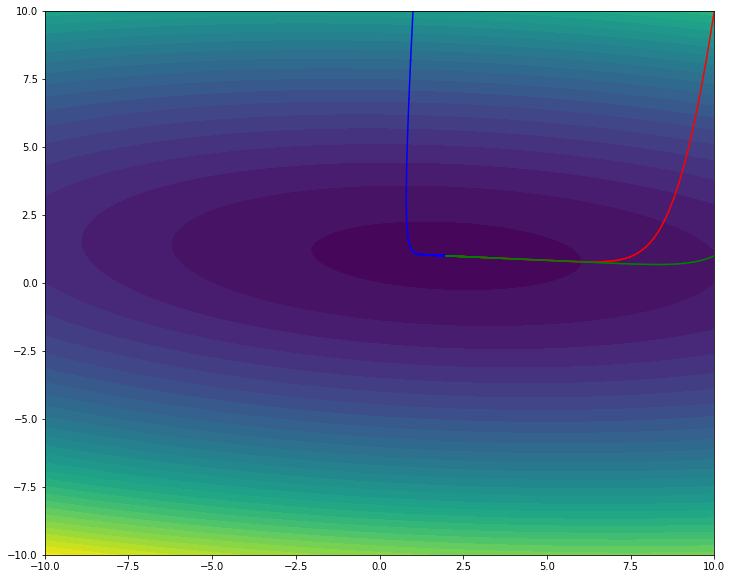

In [9]:
fig, ax = plt.subplots(figsize=(12,10))

xlist = np.linspace(-10, 10, 500)
ylist = np.linspace(-10, 10, 500)
X, Y = np.meshgrid(xlist, ylist)
Z = np.vectorize(f, signature='(2)->()')(np.stack((X, Y), axis=-1))

plt.contourf(X, Y, Z, levels=30)
 

for i in range(len(xs1)):
     ax.plot(xs1[i:i+2, 0], xs1[i:i+2, 1], c='b')
for i in range(len(xs2)):
     ax.plot(xs2[i:i+2, 0], xs2[i:i+2, 1], c='r')
for i in range(len(xs3)):
     ax.plot(xs3[i:i+2, 0], xs3[i:i+2, 1], c='g')


### 10

In [10]:
def f(x):
    s = 0
    for i in range(1, x.shape[0]):
        s += (2*x[i-1]**2 - x[i] - 1)**2
    return s + (x[0] - 1)**2 / 4.

In [11]:
def gradf(x):
    n = x.shape[0]
    g = np.zeros(n)
    h = 1e-6
    for i in range(n):
        e_i = np.zeros(n)
        e_i[i] = 1
        g[i] = (f(x+h*e_i)-f(x-h*e_i))/h/2
        e_i[i] = 0
    return g

In [12]:
def f_alpha(x, g, alpha):
    return f(x - alpha * g)

n = 3

In [13]:
x0 = np.array([-1.5, 1, 1])
g0 = gradf(x0)
alphas = np.arange(0, 1, 0.001)
funcs = [f_alpha(x0, g0, alpha) for alpha in alphas]
best_ind = np.argmin(funcs)
best_alpha = alphas[best_ind]

In [14]:
print(f'Best alpha: {best_alpha}, f(x0): {f(x0)}, f(x1): {f_alpha(x0, g0, best_alpha)}')

Best alpha: 0.016, f(x0): 7.8125, f(x1): 1.1171558400484307


n = 10

In [15]:
x0 = np.array([-1.5, 1, 1, 1, 1, 1, 1, 1, 1, 1])
alphas = np.arange(0, 0.5, 0.001)
g0 = gradf(x0)
funcs = [f_alpha(x0, g0, alpha) for alpha in alphas]
best_ind = np.argmin(funcs)
best_alpha = alphas[best_ind]

In [16]:
print(f'Best alpha: {best_alpha}, f(x0): {f(x0)}, f(x1): {f_alpha(x0, g0, best_alpha)}')

Best alpha: 0.016, f(x0): 7.8125, f(x1): 1.1171558400484307


In [17]:
def get_best_alpha(x):
    g = gradf(x)
    alphas = np.arange(0, 1, 0.001)
    funcs = [f_alpha(x, g, alpha) for alpha in alphas]
    best_ind = np.argmin(funcs)
    best_alpha = alphas[best_ind]
    
    return best_alpha

In [18]:
def gradient_descent(x0, alpha='argmin', max_iter=1000, tol=1e-6):
    x = x0
    num_steps = 0
    for i in range(max_iter):
        if alpha == 'argmin':
            a = get_best_alpha(x)
        else:
            a = alpha  
        cur_x = x - a*gradf(x)
        num_steps += 1
        if np.linalg.norm(cur_x - x) <= tol:
            break
        x = cur_x
        
    return num_steps, f(x), x

n = 3

In [19]:
x0 = np.array([-1.5, 1, 1])

In [20]:
np.set_printoptions(precision=3)
num_steps, fmin, xmin = gradient_descent(x0, alpha='argmin')
print(f'fmin: {fmin}, xmin: {xmin}, num_steps: {num_steps}')

fmin: 0.003175903193043963, xmin: [ 0.889  0.571 -0.35 ], num_steps: 1000


In [21]:
np.set_printoptions(precision=3)
num_steps, fmin, xmin = gradient_descent(x0, alpha=0.1, max_iter=10)
print(f'fmin: {fmin}, xmin: {xmin}, num_steps: {num_steps}')

fmin: 4.7775490395257e+41, xmin: [1.859e+10 1.841e+06 7.821e+02], num_steps: 6


In [22]:
np.set_printoptions(precision=3)
num_steps, fmin, xmin = gradient_descent(x0, alpha=0.5, max_iter=5)
print(f'fmin: {fmin}, xmin: {xmin}, num_steps: {num_steps}')

fmin: 2.451562444818585e+56, xmin: [8.848e+13 1.024e+09 2.350e+01], num_steps: 4


In [23]:
np.set_printoptions(precision=3)
num_steps, fmin, xmin = gradient_descent(x0, alpha=1.0, max_iter=5)
print(f'fmin: {fmin}, xmin: {xmin}, num_steps: {num_steps}')

fmin: 7.810397689734698e+72, xmin: [1.182e+18 1.723e+02 1.410e+02], num_steps: 4


We see that only for argmin method for alpha the algorithm yields reasonable a reasonable result. For $\alpha \geq 0.1$ the values shoot up insanely. For the argmin method it converges in > 1000 steps.

n = 10

In [24]:
x0 = np.array([-1.5, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [25]:
np.set_printoptions(precision=3)
num_steps, fmin, xmin = gradient_descent(x0, alpha='argmin')
print(f'fmin: {fmin}, xmin: {xmin}, num_steps: {num_steps}')

fmin: 0.9830311985437051, xmin: [-0.965  0.991  0.998  0.999  1.     1.     1.     1.     1.     1.   ], num_steps: 15


In [26]:
np.set_printoptions(precision=3)
num_steps, fmin, xmin = gradient_descent(x0, alpha=0.1, max_iter=5)
print(f'fmin: {fmin}, xmin: {xmin}, num_steps: {num_steps}')

fmin: 4.777549842624381e+41, xmin: [ 1.859e+10  1.846e+06  1.565e+03 -9.193e-01  1.500e+00  1.000e+00
  1.000e+00  1.000e+00  1.000e+00  1.000e+00], num_steps: 5


In [27]:
np.set_printoptions(precision=3)
num_steps, fmin, xmin = gradient_descent(x0, alpha=0.5, max_iter=5)
print(f'fmin: {fmin}, xmin: {xmin}, num_steps: {num_steps}')

fmin: 2.451562444818585e+56, xmin: [8.848e+13 1.024e+09 2.350e+01 1.000e+00 1.000e+00 1.000e+00 1.000e+00
 1.000e+00 1.000e+00 1.000e+00], num_steps: 4


In [28]:
np.set_printoptions(precision=3)
num_steps, fmin, xmin = gradient_descent(x0, alpha=1.0, max_iter=5)
print(f'fmin: {fmin}, xmin: {xmin}, num_steps: {num_steps}')

fmin: 7.810397689734698e+72, xmin: [1.182e+18 1.723e+02 1.410e+02 1.000e+00 1.000e+00 1.000e+00 1.000e+00
 1.000e+00 1.000e+00 1.000e+00], num_steps: 4


Same for the 10-dimensional case. For the argmin method it converges in 15 steps.

In [29]:
from scipy.optimize import minimize

n = 3

In [30]:
optim = minimize(f, x0=np.array([-1.5, 1, 1]), method='CG', tol=1e-6)

xmin, num_steps = optim['x'], optim['nit']
print(f'xmin: {xmin}, num_steps: {num_steps}')

xmin: [1. 1. 1.], num_steps: 119


n = 10

In [31]:
optim = minimize(f, x0=np.array([-1.5, 1, 1, 1, 1, 1, 1, 1, 1, 1]), method='CG', tol=1e-6)

xmin, num_steps = optim['x'], optim['nit']
print(f'xmin: {xmin}, num_steps: {num_steps}')

xmin: [-0.965  0.991  0.998  0.998  0.995  0.98   0.922  0.701 -0.016 -0.999], num_steps: 2000


Works fine.